# Hadley Bennett - Machine Learning 

## Breast Cancer Cell Data Analysis

In [28]:
""" Loads Data """
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [29]:
""" Describes Data """
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
""" Checks sample and target sizes """
print("sample size: ", bc.data.shape) #data = cancer cell features
print("target size: ", bc.target.shape) #target = malignant || benign

sample size:  (569, 30)
target size:  (569,)


In [31]:
""" Split Data """
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (bc.data, bc.target, random_state=11)

In [32]:
""" Creates Prediction Model """
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [33]:
""" Trains Prediction Model """
model.fit(X=X_train, y=y_train)

GaussianNB()

In [34]:
""" Predict """
predict = model.predict(X=X_test)
expected = y_test
print("predicted: ", predict[:20])
print("expected: ", expected[:20])

predicted:  [0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
expected:  [0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]


In [35]:
""" Determines Accurucy with Score """
print(f'{model.score(X_test, y_test):.2%}') #model test set
print(f'{model.score(bc.data, bc.target):.2%}') #entire set

95.10%
94.02%


In [36]:
""" Determines Accurucy with Confushion Matrix """
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=expected, y_pred=predict)
print(confusion)

[[44  6]
 [ 1 92]]


In [37]:
""" Determine Accurucy with Classification Report """
from sklearn.metrics import classification_report
names = [str(bc) for bc in bc.target_names]
print(names)

print("\n", classification_report(expected, predict, target_names=names))

['malignant', 'benign']

               precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



The matrix indicates a high precision rate for both malignant and benign. Recall is very high for benign and a bit lower for malignant. When support is lower, it might be easier for recall to be affected, leading to potentially lower recall values. The average accuracy of the model is 95%. 

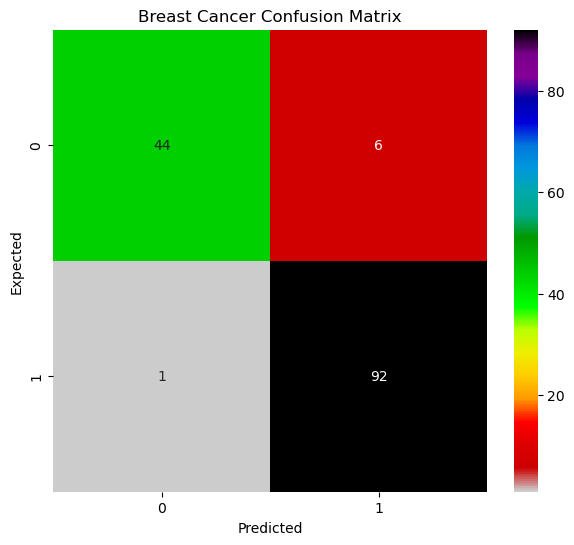

In [38]:
""" Visualize Confushion Matrix """
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, cmap=plt.cm.nipy_spectral_r) 

axes.set(xlabel='Predicted', ylabel='Expected', title='Breast Cancer Confusion Matrix')
plt.show()

In [39]:
""" K-Fold Cross Validation """
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=model, X=bc.data, y=bc.target, cv=kf)
print(scores)
print(f'\nMean accuracy: {scores.mean():.2%}')

[0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]

Mean accuracy: 93.85%


In [45]:
""" Run Multiple Models """
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#dictionary of classifiers
estimator = {
'KNeighborsClassifier': KNeighborsClassifier(),
'SVC': SVC(gamma = 'scale'),
'GaussianNB': GaussianNB(),
'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
 }
#iterate
for name, obj in estimator.items():
    kf = KFold(n_splits=10, random_state=11, shuffle=True) #kfold 10 splits
    scores=cross_val_score(estimator=obj, #cross valid
                           X=bc.data, y=bc.target, cv=kf)
    print(f'{name:>20}: ' +
          f'mean accuracy = {scores.mean():.2%}; ' +
          f'standard deviation = {scores.std():.2%} ' )

C:\Users\yourb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yourb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNeighborsClassifier: mean accuracy = 92.79%; standard deviation = 2.01% 
                 SVC: mean accuracy = 91.92%; standard deviation = 3.52% 
          GaussianNB: mean accuracy = 93.85%; standard deviation = 2.75% 
  LogisticRegression: mean accuracy = 95.26%; standard deviation = 2.72% 


PERFORMANCE

All models show high mean accuracy, indicating good performance on average.
LogisticRegression has the highest mean accuracy, suggesting it performs slightly better on this dataset compared to the other models.
Standard deviations provides insight into the accuracy of the models.Lower standard deviations suggest more consistent performance across folds.